The first step is to import this dataset into our program. We wil use Python's pandas library.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the Data and Performing Basic Data checks

In [8]:
diabetes = pd.read_csv('diabetes_csv.csv')

To see what this dataset actually looks like, execute the following command.

In [9]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [10]:
diabetes.shape

(768, 9)

In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
insu     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 60.0+ KB


By visualizing the distribution of the eight variables in the dataset.

/usr/lib/python3/dist-packages/pandas/tools/plotting.py:3303: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  "is being cleared", UserWarning)


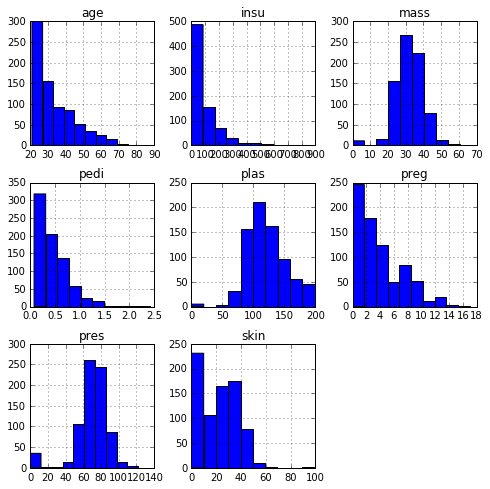

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
diabetes.hist(ax=ax)
plt.show()

Assign data from first seven columns to X variable

In [14]:
X = diabetes.iloc[:, 0:8]
print(X)

     preg  plas  pres  skin  insu  mass   pedi  age
0       6   148    72    35     0  33.6  0.627   50
1       1    85    66    29     0  26.6  0.351   31
2       8   183    64     0     0  23.3  0.672   32
3       1    89    66    23    94  28.1  0.167   21
4       0   137    40    35   168  43.1  2.288   33
5       5   116    74     0     0  25.6  0.201   30
6       3    78    50    32    88  31.0  0.248   26
7      10   115     0     0     0  35.3  0.134   29
8       2   197    70    45   543  30.5  0.158   53
9       8   125    96     0     0   0.0  0.232   54
10      4   110    92     0     0  37.6  0.191   30
11     10   168    74     0     0  38.0  0.537   34
12     10   139    80     0     0  27.1  1.441   57
13      1   189    60    23   846  30.1  0.398   59
14      5   166    72    19   175  25.8  0.587   51
15      7   100     0     0     0  30.0  0.484   32
16      0   118    84    47   230  45.8  0.551   31
17      7   107    74     0     0  29.6  0.254   31
18      1   

Assign data from first eigth columns to y variable

In [15]:
y = diabetes.select_dtypes(include = [object])

In [16]:
#print(y)

In [10]:
y.head()

,class
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


We have two unique classes "tested_positive" and "tested negative". Lets convert these categorical values to numerical values. We will use Scikit-learn LabelEncoder class. 

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)

Train Test Split

We will divide our dataset into training and test splits. The training data will be used to train 
the neural network and the test data will be used to evaluate the performance of the neural network. This helps with the 
problem of over-fitting because we are evaluating our neural network on data that it has not seen (i.e. been trained on) 
before.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20)


Feature Scaling

The following script performs feature scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)



/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Evaluating the Neural Network model

We will build the neural network model using the scikit-learn library's, 'Multi-Layer Perceptron Classifier'. The 
first parameter 'hidden_layer_sizes' arugument set to three layers 10 nodes each.

In [15]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter = 1850)

In [16]:
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1850, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

The final step is to make predictions on our test data

In [17]:
predictions = mlp.predict(X_test)

Evaluating the Algorithm 

Now it is time to evaluate performance of the model. Being a classification algorithm, the most commonly used metrics are 
a confusion matrix, precision, recall, and f1 score.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, predictions))

[[12  3]
 [ 1  4]]


In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.57      0.80      0.67         5

   micro avg       0.80      0.80      0.80        20
   macro avg       0.75      0.80      0.76        20
weighted avg       0.84      0.80      0.81        20



The above output shows the performance of the model on training data. The accuracy and the f1-score is around 0.81, respectively 